In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


<h1 style="color:magenta; font-family:Cursive"><center>Data Science Job Salary</center></h1> 

![ ](https://www.dataquest.io/wp-content/uploads/2019/05/what-is-data-science.jpg)




<h2 style="color:magenta; font-family:Cursive">Motivation⚡</h2> 


**COVID-19 pandemic** has hugely appended the lives of millions of employed professionals, especially the ones working in the **data and analytics** industry. Not only this crisis has brought in the **new normal** of **remote working** but has also pushed analytics in the forefront, which in turn, has altered the way analytics professionals carry out their work. In fact, according to a recent survey done by Analytics India Magazine, it has been noted that 92% of leadership believe that the **demand for analytics** would gain traction in the **post-COVID world**, which will bring out the necessity for organisations to **hire new analytics talent**.


<h2 style="color:magenta; font-family:Cursive">Goal of creating this Notebook🎯</h2>

1. How many people worked from 'HOME'?
2. What is the ratio of On-site:Hybrid:Remote working?
3. What are the top Job Titles?
4. How the salary varies with change in job title and experience level?

<h2 style="color:magenta; font-family:Cursive">Dataset Dictionary📖</h2>

[**Dataset**](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

**work_year** -	The year the salary was paid.

**experience_level** - The experience level in the job during the year with the following possible values:    
                        EN = Entry-level / Junior     
                        MI = Mid-level / Intermediate     
                        SE = Senior-level / Expert     
                        EX = Executive-level / Director
                        
**employment_type** - The type of employement for the role:     
                      PT = Part-time     
                      FT = Full-time      
                      CT = Contract      
                      FL = Freelance     
                    
**job_title** -	The role worked in during the year.

**salary**	- The total gross salary amount paid.

**salary_currency** - The currency of the salary paid as an [ISO 4217](https://en.wikipedia.org/wiki/ISO_4217) [currency code](https://en.wikipedia.org/wiki/ISO_4217#Active_codes).

**salary_in_usd** - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

**employee_residence** - Employee's primary country of residence in during the work year as an [ISO 3166 country code](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes#Current_ISO_3166_country_codes)(Alpha-2 code).

**remote_ratio** - The overall amount of work done remotely, possible values are as follows:      
                   0   = No remote work (less than 20%)      
                   50  = Partially remote      
                   100 = Fully remote (more than 80%)     
                    
**company_location** - The country of the employer's main office or contracting branch as an [ISO 3166 country code](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes#Current_ISO_3166_country_codes)(Alpha-2 code).

**company_size** - The average number of people that worked for the company during the year:      
                   S = less than 50 employees (small)      
                   M = 50 to 250 employees (medium)      
                   L = more than 250 employees (large)     

<h1 style="color:magenta; font-family:Cursive">Import Libraries</h1>

In [3]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 13.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=8f4c597b870d43feb7304d8ab83568487a034776240b636d8108b58ec9f575f5
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import pycountry
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud

<h2 style="color:magenta; font-family:Cursive">Getting Dataset

In [8]:
df = pd.read_csv('/content/drive/MyDrive/MLstart/Data Science Jobs/ds_salaries.csv', index_col = 0)


FileNotFoundError: ignored

<h2 style="color:magenta; font-family:Cursive">Knowing Dataset

In [ ]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [ ]:
#Converting country codes to country names for employee_residence and company_location
resi_country_list = []
comp_country_list = []
for country_code in df.employee_residence:
    resi_country_list.append(pycountry.countries.get(alpha_2=country_code).name)

for country_code in df.company_location:
    comp_country_list.append(pycountry.countries.get(alpha_2=country_code).name)

df['employee_residence'] = resi_country_list
df['company_location'] = comp_country_list

#Replacing some of the values to understand the graphs clearly
df.remote_ratio.replace([100,50,0], ['Remote', 'Hybrid' ,'On-site'],inplace = True)
df.experience_level.replace(['EN','MI','SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,FT,Data Scientist,70000,EUR,79833,Germany,On-site,Germany,L
1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,Japan,On-site,Japan,S
2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,United Kingdom,Hybrid,United Kingdom,M
3,2020,Mid,FT,Product Data Analyst,20000,USD,20000,Honduras,On-site,Honduras,S
4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,United States,Hybrid,United States,L


<h1 style="color:magenta; font-family:Cursive">Exploratory Data Analysis 📊

<h3 style="color:magenta; font-family:Cursive">Univarient Analysis 

In [ ]:
px.histogram(df, x = 'employment_type',histnorm = 'percent', text_auto = '.2f', title = 'Precentage of Employment Types')

In [ ]:
px.histogram(df, x = 'remote_ratio', title='Count of each Work Type')

In [ ]:
px.histogram(df, x = df.employee_residence.sort_values(), title='Count of Employee residence in each country')

<h3 style="color:magenta; font-family:Cursive">Multivarient Analysis

In [ ]:
px.scatter(df, x=df.employee_residence.sort_values(), y = df.company_location.sort_values(), color = 'remote_ratio',
           labels ={"x":'Employee Residence', "y":'Company Location', "remote_ratio":'Work Type', 'salary_in_usd':'Salary(USD)'}, 
           title = 'Company Location VS Employee Residence for type of work(Remote, Hybrid or On-site)')

In [ ]:
px.histogram(df, x=df.job_title.sort_values(), color = 'experience_level', height = 800, barmode = 'group',
             text_auto  = True, title = 'Count of number of people with all experience levels in each job')

In [ ]:
px.scatter(df, x = 'salary_in_usd', y = 'experience_level', size = 'salary_in_usd', hover_name = 'job_title', color = 'job_title', 
           animation_frame = 'work_year', title = 'Experience level VS Salary').update_yaxes(categoryarray = ['Entry', 'Mid', 'Senior', 'Executive'])


<h2 style="color:magenta; font-family:Cursive">Word Cloud of Job Titles

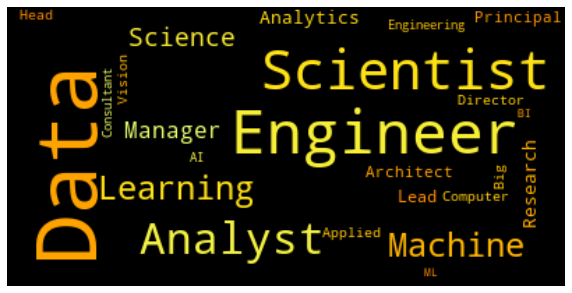

In [ ]:
text = " ".join(job_titles for job_titles in df["job_title"])
word_cloud = WordCloud(collocations = False, background_color = 'black', colormap = 'Wistia', min_font_size = 8).generate(text)
plt.figure(figsize = (10, 8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()


<h2 style="color:magenta; font-family:Cursive">Comment your views💡 and thanks for coming soo far and viewing my work </h2>


## To be continued..... 

### References
 
https://analyticsindiamag.com/things-that-would-change-for-new-data-scientists-due-to-covid-19-pandemic/
https://www.forbes.com/sites/bernardmarr/2020/03/13/coronavirus-how-artificial-intelligence-data-science-and-technology-is-used-to-fight-the-pandemic/?sh=4603f3e35f5f